In [1]:
import os
import shutil
import random
from glob import glob
import json
from IPython.display import Image, display
import cv2
import matplotlib.pyplot as plt

In [2]:
import torch
print(f"MPS available: {torch.backends.mps.is_available()}")

MPS available: True


In [3]:
import torch

if torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Using device:", device)


Using device: mps


In [7]:
from ultralytics import YOLO

# Load your pre-trained segmentation model
model = YOLO("yolov8s-seg.pt")

# Define the path to your data.yaml file (update this path accordingly)
data_yaml_path = "/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/data.yaml"  # Replace with your actual path

# Set training parameters
epochs = 25         # Number of epochs
imgsz = 256         # Use the original image resolution of 256x256
batch_size = 16     # Set an initial batch size (adjust if necessary)

# Start training
results = model.train(data=data_yaml_path, epochs=epochs, imgsz=imgsz, batch=batch_size)

# Print a summary of the results
print(results)


Ultralytics 8.3.91 🚀 Python-3.9.21 torch-2.6.0 CPU (Apple M1 Pro)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

train: Scanning /Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/train

train: New cache created: /Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/train/labels.cache



val: Scanning /Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/val/lab

val: New cache created: /Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/val/labels.cache
Plotting labels to runs/segment/train4/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs/segment/train4
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      2.299      3.686      2.714      1.516         93   
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        100         10    0.00472        0.2    0.00287   0.000903    0.00472        0.2    0.00306   0.000587

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G      2.207      3.016      1.936      1.383        121   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00673        0.1      0.002   0.000923    0.00261        0.2    0.00086   0.000308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G      2.289      3.037       1.97      1.424        145   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00235        0.5    0.00145   0.000481    0.00282        0.6    0.00199   0.000435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G      2.325      3.048      1.957      1.429        102   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00705        0.3    0.00308   0.000568    0.00235        0.1    0.00173   0.000426



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G      2.223      2.957      1.853      1.397         62   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10      0.035        0.2     0.0162    0.00361     0.0175        0.1     0.0099    0.00198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/25         0G      2.224      2.842      1.788      1.371        111   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0227        0.2    0.00685    0.00147     0.0227        0.2    0.00784    0.00084



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/25         0G      2.228      2.839       1.82      1.382        101   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10      0.029        0.2     0.0147    0.00421      0.029        0.2     0.0143    0.00344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/25         0G      2.132      2.808      1.754      1.339         95   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0261        0.1    0.00722    0.00385     0.0261        0.1    0.00671    0.00215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/25         0G      2.067      2.731      1.645      1.316        116   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00722        0.3    0.00456    0.00135    0.00961        0.4    0.00506    0.00108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/25         0G      2.069      2.653      1.682      1.328        109   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0078        0.2    0.00494    0.00184     0.0078        0.2    0.00437    0.00123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/25         0G      1.979       2.62      1.589      1.267         64   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0123        0.1    0.00517    0.00236     0.0123        0.1    0.00577    0.00142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/25         0G      2.016       2.69      1.595      1.267         67   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0124        0.4    0.00716    0.00201     0.0152        0.5    0.00932    0.00188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/25         0G      1.931       2.68      1.582      1.265        101   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00731        0.4    0.00592    0.00175     0.0063      0.371    0.00448    0.00122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/25         0G      1.975      2.598      1.552       1.27         79   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00504        0.2    0.00378    0.00152    0.00962        0.2    0.00293   0.000872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/25         0G      1.949      2.617      1.568      1.269        113   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00421        0.4    0.00291    0.00108    0.00689        0.2    0.00395   0.000717


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/25         0G      1.984      2.678      1.683      1.284         28   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00988        0.3    0.00765    0.00156    0.00988        0.3    0.00636     0.0027



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/25         0G       1.97      2.582      1.609      1.275         91   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00729        0.1     0.0055    0.00213    0.00963        0.7    0.00884    0.00196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/25         0G      1.951      2.608      1.594      1.291         54   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0213        0.2    0.00844    0.00331     0.0208        0.2     0.0112    0.00298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/25         0G       1.88       2.51      1.534      1.264         29   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0174        0.1    0.00545     0.0024     0.0174        0.1    0.00513    0.00146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/25         0G      1.895      2.505      1.452      1.248         49   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0201        0.1    0.00728    0.00252     0.0201        0.1    0.00837    0.00242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/25         0G      1.862      2.473      1.463      1.239         48   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10      0.159        0.1     0.0315     0.0117      0.159        0.1     0.0287    0.00879



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/25         0G      1.824      2.439      1.431      1.204         43   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0456        0.1     0.0153    0.00583     0.0456        0.1     0.0123    0.00404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/25         0G      1.826      2.448      1.446       1.23         87   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0824        0.1     0.0196    0.00842     0.0824        0.1     0.0197    0.00662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/25         0G      1.781      2.355      1.381      1.173         50   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0492        0.1     0.0162    0.00514     0.0492        0.1     0.0169    0.00423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/25         0G      1.752      2.394      1.381      1.182         78   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0381        0.1     0.0152    0.00548     0.0381        0.1      0.015    0.00471



25 epochs completed in 0.575 hours.
Optimizer stripped from runs/segment/train4/weights/last.pt, 23.8MB
Optimizer stripped from runs/segment/train4/weights/best.pt, 23.8MB

Validating runs/segment/train4/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.9.21 torch-2.6.0 CPU (Apple M1 Pro)
YOLOv8s-seg summary (fused): 85 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        100         10       0.16        0.1     0.0315     0.0117       0.16        0.1     0.0287    0.00879
Speed: 0.1ms preprocess, 91.8ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/segment/train4
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x323498610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0

In [11]:
from ultralytics import YOLO

model = YOLO("yolov8s-seg.pt")
results = model.train(
    data="/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/data.yaml",
    epochs=50,
    batch=32,
    imgsz=256
)


Ultralytics 8.3.91 🚀 Python-3.9.21 torch-2.6.0 CPU (Apple M1 Pro)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning /Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/train
val: Scanning /Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/val/lab

Plotting labels to runs/segment/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs/segment/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.393      3.989      3.094      1.616         81   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0043        0.2    0.00186   0.000776    0.00866        0.1    0.00399    0.00108

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       2/50         0G      2.056       3.01      1.949      1.333        119   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00339        0.5     0.0021   0.000792    0.00293        0.2    0.00175   0.000484

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       3/50         0G      2.134      3.046      1.871      1.364        114   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00449        0.3    0.00369     0.0014    0.00278        0.2     0.0011   0.000164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       4/50         0G      2.201      2.925      1.841      1.387         70   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10   0.000635        0.2    0.00035    8.4e-05    0.00045        0.1   0.000211   5.48e-05

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       5/50         0G      2.163      2.844      1.834      1.353         69   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00184        0.1    0.00149   0.000621    0.00181        0.1    0.00119   0.000613

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       6/50         0G      2.099      2.772      1.739      1.317         67   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00096        0.1   0.000565   0.000191   8.91e-05        0.1   5.43e-05   7.72e-06

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       7/50         0G      2.084      2.786      1.676      1.342        136   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00531        0.1    0.00259   0.000801   0.000231        0.2   0.000165   4.26e-05

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       8/50         0G      2.145      2.812      1.752      1.331         80   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00886        0.2    0.00411    0.00107    0.00886        0.2    0.00394   0.000584

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       9/50         0G      2.127      2.789      1.673      1.315        119   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0114        0.1    0.00441     0.0029     0.0114        0.1    0.00469    0.00133

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      10/50         0G      2.122      2.776      1.693      1.326        131   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10   0.000802        0.4   0.000725   0.000348   0.000662        0.1   0.000665   0.000156

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      11/50         0G       2.07      2.721      1.695      1.315         85   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00486        0.1    0.00343   0.000662    0.00384        0.2    0.00176   0.000325

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      12/50         0G      2.063       2.66      1.673      1.317         93   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00734        0.4    0.00413     0.0011    0.00734        0.4    0.00342   0.000795

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      13/50         0G      2.007      2.666       1.65      1.264         88   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0153        0.2    0.00589    0.00123     0.0123        0.1    0.00316   0.000541

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      14/50         0G      2.013      2.598      1.619      1.262         45   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0228        0.1    0.00659    0.00239     0.0228        0.1    0.00455    0.00108

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      15/50         0G      1.943      2.655      1.598      1.249        152   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0259        0.2     0.0116    0.00397     0.0245        0.1    0.00781    0.00222

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      16/50         0G       1.95      2.565       1.57      1.247        156   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0274        0.1     0.0099    0.00448     0.0305        0.2     0.0144    0.00349

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      17/50         0G      1.991      2.623      1.611      1.274        122   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0278        0.3      0.016    0.00407     0.0345        0.4     0.0192    0.00405

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      18/50         0G       1.87      2.521      1.475      1.231         98   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0855        0.1     0.0169     0.0076     0.0855        0.1     0.0182    0.00508

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      19/50         0G      1.944      2.614      1.486      1.227        137   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0985        0.1     0.0309     0.0164     0.0985        0.1     0.0283    0.00828



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.921      2.547       1.48      1.233        126   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0114        0.2    0.00561    0.00171     0.0106        0.1     0.0046    0.00122

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      21/50         0G      1.882      2.491      1.507      1.232         83   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0186        0.2     0.0085    0.00283     0.0186        0.2    0.00869    0.00226

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      22/50         0G       1.81      2.486      1.512      1.221         72   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0178        0.2    0.00945    0.00381     0.0178        0.2    0.00997     0.0024

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      23/50         0G      1.865      2.468       1.47      1.228         69   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0286        0.1     0.0064    0.00154    0.00128        0.1   0.000354   6.36e-05

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      24/50         0G      1.754      2.502      1.364      1.174         50   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0141        0.2    0.00651    0.00254    0.00703        0.1    0.00229   0.000421

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      25/50         0G      1.802      2.493      1.417      1.208         83   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0106        0.3     0.0064    0.00244     0.0106        0.3    0.00408   0.000999

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      26/50         0G      1.799      2.458      1.442      1.174        148   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0149        0.2    0.00874    0.00367      0.018        0.2    0.00797    0.00112

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      27/50         0G      1.819      2.398      1.399      1.176        151   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0216        0.4     0.0118    0.00411     0.0175        0.2    0.00715    0.00164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      28/50         0G      1.736      2.366      1.342      1.159         85   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0136        0.1    0.00685    0.00298     0.0136        0.1    0.00414    0.00112

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      29/50         0G      1.734      2.335      1.325      1.164         88   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0282        0.1    0.00943    0.00391     0.0282        0.1     0.0079    0.00233

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      30/50         0G      1.775      2.331      1.381      1.185         78   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00895        0.3    0.00666    0.00246      0.009        0.3    0.00511    0.00114

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      31/50         0G      1.694      2.334      1.324      1.157         55   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0136        0.3    0.00736     0.0028    0.00633        0.1    0.00207   0.000697

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      32/50         0G      1.775      2.386      1.353      1.164         93   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10      0.011        0.2    0.00725    0.00316     0.0154        0.3    0.00597    0.00111

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      33/50         0G      1.681      2.336      1.277      1.132        149   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0113        0.3    0.00706     0.0025     0.0163        0.4    0.00819    0.00147

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      34/50         0G      1.675      2.262      1.233      1.144         92   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10    0.00984        0.1    0.00496     0.0022    0.00984        0.1    0.00383   0.000818

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      35/50         0G      1.694      2.309      1.272      1.158         70   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0163        0.2    0.00923     0.0033     0.0106        0.3    0.00666     0.0011

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      36/50         0G      1.687      2.319       1.29      1.127        147   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0197        0.1    0.00832    0.00299     0.0197        0.1    0.00474    0.00098

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      37/50         0G       1.63      2.249      1.262      1.109        103   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0167        0.1     0.0101    0.00356     0.0167        0.1    0.00758    0.00153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.607      2.246      1.196      1.107        107   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0308        0.1     0.0112    0.00509     0.0308        0.1    0.00989    0.00246

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      39/50         0G      1.612      2.179      1.184      1.097        104   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0412        0.1     0.0142    0.00683     0.0412        0.1     0.0157    0.00448

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      40/50         0G      1.581      2.247      1.205       1.11         93   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0346        0.1     0.0185    0.00741     0.0346        0.1     0.0135     0.0037
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      41/50         0G      1.652      2.235      1.271      1.125         50   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0296        0.1     0.0146    0.00607     0.0296        0.1     0.0139    0.00392

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      42/50         0G      1.657      2.248      1.225      1.115        100   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0189        0.1     0.0107    0.00381     0.0189        0.1    0.00703    0.00195

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      43/50         0G      1.589      2.217      1.155      1.103         95   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0103        0.3    0.00855    0.00318     0.0117        0.1    0.00597     0.0015

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      44/50         0G      1.546       2.15      1.154      1.082         62   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0172        0.1    0.00995    0.00376     0.0172        0.1    0.00726    0.00182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      45/50         0G      1.603      2.219      1.192      1.108         88   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0113        0.1    0.00667    0.00229     0.0121        0.2    0.00506    0.00124

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      46/50         0G      1.564      2.153      1.126      1.076         64   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0132        0.2    0.00709    0.00201     0.0132        0.2      0.005     0.0012

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      47/50         0G      1.544      2.156      1.128      1.079         85   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0133        0.2    0.00784    0.00266     0.0133        0.2    0.00519    0.00118

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      48/50         0G      1.541      2.134       1.13      1.076         46   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0129        0.2     0.0085    0.00284     0.0129        0.2    0.00453    0.00119

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      49/50         0G      1.504       2.09      1.035      1.044        110   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0133        0.2    0.00867    0.00289     0.0133        0.2    0.00468   0.000894

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      50/50         0G      1.491      2.111       1.05      1.055         46   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100         10     0.0132        0.2    0.00929    0.00357     0.0132        0.2    0.00637     0.0014

50 epochs completed in 1.093 hours.


Optimizer stripped from runs/segment/train/weights/last.pt, 23.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 23.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.9.21 torch-2.6.0 CPU (Apple M1 Pro)
YOLOv8s-seg summary (fused): 85 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        100         10     0.0985        0.1     0.0309     0.0164     0.0985        0.1     0.0299    0.00844
Speed: 0.2ms preprocess, 85.4ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/segment/train


In [15]:
import os

# Define paths to your images and labels directories
images_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/val/images"
labels_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/val/labels"

# Create the labels folder if it doesn't exist
os.makedirs(labels_folder, exist_ok=True)

# Allowed image extensions (adjust as needed)
allowed_extensions = {'.jpg', '.jpeg', '.png'}

# Loop through each file in the images folder
for filename in os.listdir(images_folder):
    base, ext = os.path.splitext(filename)
    if ext.lower() in allowed_extensions:
        label_file = os.path.join(labels_folder, base + ".txt")
        # If the label file doesn't exist, create an empty one
        if not os.path.exists(label_file):
            open(label_file, 'w').close()
            print(f"Created empty label file for {filename}")


Created empty label file for d535908b-c781-41c5-9afc-b7aa0358d466___JR_Sept.L.S 8389.JPG
Created empty label file for 945f1d4c-7a9f-48e0-98a5-da3e2976077a___GCREC_Bact.Sp 3368.JPG
Created empty label file for 8a13da5b-4bc2-485a-962d-df8c6634ea00___RS_Erly.B 7519.JPG
Created empty label file for 457abc75-46bc-41a9-8490-e9f6d19a48f3___JR_HL 8508.JPG
Created empty label file for 27a25a3a-a15b-433b-8ec6-ed9cdb0299ab___YLCV_GCREC 2420.JPG
Created empty label file for 37e19e70-4ecd-4ece-90a7-31f1c7e22c44___UF.GRC_YLCV_Lab 08549.JPG
Created empty label file for 8a9f0340-d5d1-479b-9dc5-d8df11685951___RS_Early.B 7024.JPG
Created empty label file for 20ab7535-34d8-4bac-b3a7-4fa929a1bed3___GHLB2 Leaf 59.1.JPG
Created empty label file for 457f4e02-65b3-4e02-ba87-7f20ab44f89e___PSU_CG 2180.JPG
Created empty label file for 9ed260d7-af82-45c4-80f1-bfb8918fe71e___YLCV_NREC 2426.JPG
Created empty label file for 0ddd62cd-a999-4d58-a8f1-506e1004a595___RS_Early.B 8041.JPG
Created empty label file for 41ad

In [17]:
import os

# Define paths
val_images_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/val/images"
val_labels_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/val/labels"

# Get a set of image base names (without extension) for common image formats
allowed_extensions = {'.jpg', '.jpeg', '.png'}
image_basenames = {os.path.splitext(f)[0] for f in os.listdir(val_images_folder)
                   if os.path.splitext(f)[1].lower() in allowed_extensions}

# Loop through label files and remove any that don't correspond to an image
for label_file in os.listdir(val_labels_folder):
    base, ext = os.path.splitext(label_file)
    if base not in image_basenames:
        file_path = os.path.join(val_labels_folder, label_file)
        os.remove(file_path)
        print(f"Removed extra label file: {label_file}")

# Count remaining label files
remaining_labels = len(os.listdir(val_labels_folder))
print(f"Remaining label files: {remaining_labels}")


Removed extra label file: dce12e0f-6f9d-4c29-ad7a-5e8216b690e0___RS_LB 4721 21.14.39.txt
Removed extra label file: 1b46f9fb-4e90-4cbf-bad5-78414e389be2___Com.G_TgS_FL 8001 20.52.11.txt
Removed extra label file: 8a9bc15a-fd14-44ac-b8eb-37ea8a209406___NREC_B.Spot 1819 20.57.22.txt
Removed extra label file: 37f580bd-7070-4cb0-b4ab-53b78ffc96ae___RS_Late.B 7109 21.02.14.txt
Removed extra label file: ac6e6cad-2932-4af0-ad68-fdf044eecc8c___NREC_B.Spot 1796 21.07.49.txt
Removed extra label file: e736c313-f469-47b4-ba17-9babaf1be4d4___YLCV_NREC 2824 21.14.39.txt
Removed extra label file: 41a298af-bb2d-4870-8a7e-a02f26d46187___UF.GRC_YLCV_Lab 08454 21.02.14.txt
Removed extra label file: ec674ddd-4f99-441f-a537-a78935cd454d___Com.G_SpM_FL 9575 21.14.39.txt
Removed extra label file: 20ab7535-34d8-4bac-b3a7-4fa929a1bed3___GHLB2 Leaf 59.1 20.59.48.txt
Removed extra label file: d535908b-c781-41c5-9afc-b7aa0358d466___JR_Sept.L.S 8389 21.10.31.txt
Removed extra label file: d5b8a6e0-d0f6-4271-9d20-2e2d

In [19]:
import os

# Define paths to your training images and labels directories
train_images_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/train/images"
train_labels_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/train/labels"

# Allowed image extensions
allowed_extensions = {'.jpg', '.jpeg', '.png'}

# Get the set of base filenames for images in the train folder
image_basenames = {os.path.splitext(f)[0] for f in os.listdir(train_images_folder)
                   if os.path.splitext(f)[1].lower() in allowed_extensions}

# Loop through the label files and remove those that don't have a corresponding image
for label_file in os.listdir(train_labels_folder):
    base, ext = os.path.splitext(label_file)
    if base not in image_basenames:
        file_path = os.path.join(train_labels_folder, label_file)
        os.remove(file_path)
        print(f"Removed extra label file: {label_file}")

# Count the remaining label files
remaining_labels = len(os.listdir(train_labels_folder))
print(f"Remaining label files in train: {remaining_labels}")


Removed extra label file: 0c4935b6-8f13-4148-b5e6-19404d49fc78___Matt.S_CG 2733.txt
Removed extra label file: .DS_Store
Removed extra label file: 26f9e49d-d900-4607-96c4-3139ba4db3d5___Matt.S_CG 6067.txt
Remaining label files in train: 400


In [33]:
import os
import shutil

# Define the paths:
new_folder = "/Users/aidarmamaturaimov/Downloads/500/labels/train/500_train"        # Folder with the 338 new annotation txt files
actual_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/train/labels"       # Your current labels folder (for all images)

# Loop through each .txt file in the new folder
for filename in os.listdir(new_folder):
    if filename.endswith(".txt"):
        src_file = os.path.join(new_folder, filename)
        dest_file = os.path.join(actual_folder, filename)
        # Copy the file from the new folder to the actual folder, replacing any existing file with the same name.
        shutil.copy2(src_file, dest_file)
        print(f"Updated: {filename}")

print("Update complete. Files not present in the new folder remain unchanged.")


Updated: 0c4935b6-8f13-4148-b5e6-19404d49fc78___Matt.S_CG 2733.txt
Updated: 1c9968b7-d736-4101-865a-4d77053d4e94___YLCV_NREC 2643.txt
Updated: 2f3e2c44-a83b-4f72-a831-ac42aec1020e___UF.GRC_BS_Lab Leaf 0211.txt
Updated: 14113767-0c24-4607-97bc-04dccb35a23c___GHLB2 Leaf 8966.txt
Updated: 79debbff-9c0f-4a5c-a4c7-4b2bc97406dc___RS_HL 0244.txt
Updated: 8a2c7bc1-fa13-4ecc-bb4e-30a71ff99ce1___YLCV_GCREC 2106.txt
Updated: 005a2c1f-4e15-49e4-9e5c-61dc3ecf9708___RS_Late.B 5096.txt
Updated: 9eeb9c15-3fc4-4340-8d7e-cc619b1a7a6e___UF.GRC_YLCV_Lab 01499.txt
Updated: 041f3e00-0236-4d32-897f-8d13f3a9aa1f___Crnl_L.Mold 9135.txt
Updated: 6fba21aa-5e08-4072-af5c-1ffb9cf67c92___GCREC_Bact.Sp 5551.txt
Updated: 2f2e9799-071b-4519-bb86-19e537330cbb___UF.GRC_YLCV_Lab 03323.txt
Updated: 8a70b737-9270-49ca-9fd2-e6468592c393___RS_LB 2978.txt
Updated: 26fc3361-60b8-426b-92e5-9ad931aa8b4a___YLCV_NREC 0116.txt
Updated: 9ed054ae-090a-47a5-a67a-8d8b7d8fe85a___YLCV_GCREC 5458.txt
Updated: 207dee29-3d2e-4f08-9642-ef4c9

In [25]:
import os
import shutil

# Define the paths:
new_folder = "/Users/aidarmamaturaimov/Downloads/500/labels/train/500_train"        # Folder with the 338 new annotation txt files
actual_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/val/images"       # Your current labels folder (for all images)

# Loop through each .txt file in the new folder
for filename in os.listdir(new_folder):
    if filename.endswith(".txt"):
        src_file = os.path.join(new_folder, filename)
        dest_file = os.path.join(actual_folder, filename)
        # Copy the file from the new folder to the actual folder, replacing any existing file with the same name.
        shutil.copy2(src_file, dest_file)
        print(f"Updated: {filename}")

print("Update complete. Files not present in the new folder remain unchanged.")


Updated: 0c4935b6-8f13-4148-b5e6-19404d49fc78___Matt.S_CG 2733.txt
Updated: 1c9968b7-d736-4101-865a-4d77053d4e94___YLCV_NREC 2643.txt
Updated: 2f3e2c44-a83b-4f72-a831-ac42aec1020e___UF.GRC_BS_Lab Leaf 0211.txt
Updated: 14113767-0c24-4607-97bc-04dccb35a23c___GHLB2 Leaf 8966.txt
Updated: 79debbff-9c0f-4a5c-a4c7-4b2bc97406dc___RS_HL 0244.txt
Updated: 8a2c7bc1-fa13-4ecc-bb4e-30a71ff99ce1___YLCV_GCREC 2106.txt
Updated: 005a2c1f-4e15-49e4-9e5c-61dc3ecf9708___RS_Late.B 5096.txt
Updated: 9eeb9c15-3fc4-4340-8d7e-cc619b1a7a6e___UF.GRC_YLCV_Lab 01499.txt
Updated: 041f3e00-0236-4d32-897f-8d13f3a9aa1f___Crnl_L.Mold 9135.txt
Updated: 6fba21aa-5e08-4072-af5c-1ffb9cf67c92___GCREC_Bact.Sp 5551.txt
Updated: 2f2e9799-071b-4519-bb86-19e537330cbb___UF.GRC_YLCV_Lab 03323.txt
Updated: 8a70b737-9270-49ca-9fd2-e6468592c393___RS_LB 2978.txt
Updated: 26fc3361-60b8-426b-92e5-9ad931aa8b4a___YLCV_NREC 0116.txt
Updated: 9ed054ae-090a-47a5-a67a-8d8b7d8fe85a___YLCV_GCREC 5458.txt
Updated: 207dee29-3d2e-4f08-9642-ef4c9

In [36]:
import os

def fix_labels(images_folder, labels_folder, allowed_extensions={'.jpg', '.jpeg', '.png'}):
    # Get a list of image files in the images folder
    image_files = [f for f in os.listdir(images_folder) if os.path.splitext(f)[1].lower() in allowed_extensions]
    image_basenames = set(os.path.splitext(f)[0] for f in image_files)
    
    # Get a list of label files in the labels folder (files ending with .txt)
    label_files = [f for f in os.listdir(labels_folder) if f.lower().endswith('.txt')]
    label_basenames = set(os.path.splitext(f)[0] for f in label_files)
    
    # Delete any label file that doesn't have a corresponding image
    for label_file in label_files:
        base = os.path.splitext(label_file)[0]
        if base not in image_basenames:
            file_path = os.path.join(labels_folder, label_file)
            os.remove(file_path)
            print(f"Deleted extra label file: {label_file}")
    
    # Refresh the label files list after deletion
    label_files = [f for f in os.listdir(labels_folder) if f.lower().endswith('.txt')]
    label_basenames = set(os.path.splitext(f)[0] for f in label_files)
    
    # For each image file that does not have a corresponding label file, create an empty one
    for image_file in image_files:
        base = os.path.splitext(image_file)[0]
        if base not in label_basenames:
            file_path = os.path.join(labels_folder, base + '.txt')
            open(file_path, 'w').close()
            print(f"Created empty label file for image: {image_file}")
    
    # Final check: Count files
    final_labels = [f for f in os.listdir(labels_folder) if f.lower().endswith('.txt')]
    print(f"Final count in {labels_folder}: {len(final_labels)} label files (should match {len(image_files)} images)")

# Define your folder paths (update these paths as needed)
train_images_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/train/images"
train_labels_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/train/labels"
val_images_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/val/images"
val_labels_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/val/labels"

# Fix labels for training and validation folders
print("Fixing TRAIN labels:")
fix_labels(train_images_folder, train_labels_folder)
print("\nFixing VAL labels:")
fix_labels(val_images_folder, val_labels_folder)


Fixing TRAIN labels:
Deleted extra label file: 0c4935b6-8f13-4148-b5e6-19404d49fc78___Matt.S_CG 2733.txt
Deleted extra label file: 14113767-0c24-4607-97bc-04dccb35a23c___GHLB2 Leaf 8966.txt
Deleted extra label file: 6fba21aa-5e08-4072-af5c-1ffb9cf67c92___GCREC_Bact.Sp 5551.txt
Deleted extra label file: ec674ddd-4f99-441f-a537-a78935cd454d___Com.G_SpM_FL 9575.txt
Deleted extra label file: a93d975c-6992-4f12-b454-5b3268961e20___RS_Late.B 4892.txt
Deleted extra label file: 6fbefe16-4635-4a03-b245-65594ded39cf___RS_Erly.B 7654.txt
Deleted extra label file: 6fc04d72-747b-4a96-912a-db0bd967ece0___RS_Early.B 8002.txt
Deleted extra label file: dfed006d-7f5e-4a06-a73b-dc6cc837b59a___GHLB2 Leaf 8793.txt
Deleted extra label file: 27c1515c-743f-4f4d-8342-fbe3cee29e7e___RS_HL 0344.txt
Deleted extra label file: 1b13e94c-da43-4bf4-9e31-d3740505b8c1___YLCV_GCREC 2662.txt
Deleted extra label file: a1abff90-34e5-464d-b4d3-0c09f5924900___RS_HL 5414.txt
Deleted extra label file: 79c34498-d83f-4afd-a339-07

In [38]:
from ultralytics import YOLO

# pre-trained segmentation model
model = YOLO("yolov8s-seg.pt")

results = model.train(
    data="/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/data.yaml",
    epochs=50,
    batch=32,
    imgsz=256
)

print(results)

Ultralytics 8.3.91 🚀 Python-3.9.21 torch-2.6.0 CPU (Apple M1 Pro)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

train: Scanning /Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/train
val: Scanning /Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/val/lab

val: New cache created: /Users/aidarmamaturaimov/Desktop/plant_disease/dataset_500/val/labels.cache
Plotting labels to runs/segment/train4/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs/segment/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.393      3.989      3.094      1.616         81   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.278      0.296      0.184     0.0616      0.278      0.259      0.177     0.0486

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       2/50         0G      2.056       3.01      1.949      1.333        119   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.194      0.328      0.136     0.0414      0.142      0.321     0.0864     0.0222

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       3/50         0G      2.134      3.046      1.871      1.364        114   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.131      0.289      0.079     0.0225      0.117      0.278     0.0628     0.0171

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       4/50         0G      2.201      2.925      1.841      1.387         70   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.106      0.271     0.0579     0.0189     0.0805      0.165     0.0321    0.00799

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       5/50         0G      2.163      2.844      1.834      1.353         69   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.217      0.365      0.158     0.0475       0.17      0.303      0.108     0.0283

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       6/50         0G      2.099      2.772      1.739      1.317         67   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436     0.0568      0.326     0.0349     0.0114     0.0577      0.233     0.0294    0.00853

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       7/50         0G      2.084      2.786      1.676      1.342        136   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.265      0.307      0.185     0.0545      0.228      0.264      0.126     0.0303

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       8/50         0G      2.145      2.812      1.752      1.331         80   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.146      0.319      0.108     0.0321       0.13      0.234      0.079     0.0183

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       9/50         0G      2.127      2.789      1.673      1.315        119   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.114      0.323     0.0865     0.0289     0.0957      0.268     0.0666      0.018

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      10/50         0G      2.122      2.776      1.693      1.326        131   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.041      0.406     0.0287    0.00997     0.0389       0.33     0.0254    0.00746



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G       2.07      2.721      1.695      1.315         85   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.139      0.255     0.0919     0.0326      0.137      0.245     0.0914     0.0293

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      12/50         0G      2.063       2.66      1.673      1.317         93   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.223      0.353      0.167     0.0589       0.21      0.282      0.138     0.0433

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      13/50         0G      2.007      2.666       1.65      1.264         88   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.283      0.275      0.183      0.061      0.266      0.259      0.167      0.051

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      14/50         0G      2.013      2.598      1.619      1.262         45   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.363      0.376      0.282     0.0984      0.328      0.381      0.254     0.0795

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      15/50         0G      1.943      2.655      1.598      1.249        152   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.346      0.362      0.254      0.088      0.336      0.358      0.249     0.0772

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      16/50         0G       1.95      2.565       1.57      1.247        156   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.386      0.399       0.31      0.111      0.441      0.307      0.293     0.0931

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      17/50         0G      1.991      2.623      1.611      1.274        122   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436       0.39       0.39      0.328      0.105      0.311      0.349      0.262     0.0747

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      18/50         0G       1.87      2.521      1.475      1.231         98   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436       0.36      0.317      0.262     0.0998      0.392      0.314      0.275      0.093

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      19/50         0G      1.944      2.614      1.486      1.227        137   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.399      0.399       0.32      0.119      0.382      0.404      0.305     0.0967

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      20/50         0G      1.921      2.547       1.48      1.233        126   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.405      0.383      0.323      0.114      0.417      0.335      0.292     0.0914

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      21/50         0G      1.882      2.491      1.507      1.232         83   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.383      0.398      0.292      0.107      0.338      0.349      0.262     0.0868

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      22/50         0G       1.81      2.486      1.512      1.221         72   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.423      0.404      0.337      0.123      0.374      0.424      0.326     0.0987

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      23/50         0G      1.865      2.468       1.47      1.228         69   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436       0.36      0.414      0.305       0.11      0.302      0.376      0.242     0.0747

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      24/50         0G      1.754      2.502      1.364      1.174         50   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.385      0.381      0.311      0.109      0.311      0.305      0.225     0.0611

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      25/50         0G      1.802      2.493      1.417      1.208         83   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436        0.4      0.385      0.278     0.0957      0.438      0.392      0.298      0.086

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      26/50         0G      1.799      2.458      1.442      1.174        148   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.377      0.411      0.314      0.105      0.311      0.356       0.23     0.0671

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      27/50         0G      1.819      2.398      1.399      1.176        151   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436       0.42      0.415      0.334      0.127      0.388      0.394       0.31      0.093

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      28/50         0G      1.736      2.366      1.342      1.159         85   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.383      0.432      0.322      0.124      0.346      0.404       0.29      0.096

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      29/50         0G      1.734      2.335      1.325      1.164         88   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.442      0.438      0.369      0.143      0.396      0.404      0.331      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.775      2.331      1.381      1.185         78   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436       0.41       0.42      0.347       0.13      0.413      0.397      0.345       0.12

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      31/50         0G      1.694      2.334      1.324      1.157         55   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.378      0.466      0.347      0.131      0.316      0.399      0.272     0.0887

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      32/50         0G      1.775      2.386      1.353      1.164         93   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.444      0.436      0.373       0.14      0.376      0.385      0.304     0.0973

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      33/50         0G      1.681      2.336      1.277      1.132        149   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436       0.41       0.45      0.342      0.127      0.372      0.399      0.304      0.095

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      34/50         0G      1.675      2.262      1.233      1.144         92   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.388      0.428      0.328      0.122      0.396      0.372      0.287     0.0902

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      35/50         0G      1.694      2.309      1.272      1.158         70   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.401      0.482       0.37      0.135      0.374      0.401      0.321      0.105

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      36/50         0G      1.687      2.319       1.29      1.127        147   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.442      0.438      0.377      0.148      0.399      0.388      0.313      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G       1.63      2.249      1.262      1.109        103   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.401      0.454      0.369      0.148      0.357      0.404      0.318      0.113

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      38/50         0G      1.607      2.246      1.196      1.107        107   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.398      0.489      0.377      0.147      0.396      0.422      0.355      0.114

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      39/50         0G      1.612      2.179      1.184      1.097        104   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.398      0.525      0.379      0.148      0.382      0.436      0.344      0.114

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      40/50         0G      1.581      2.247      1.205       1.11         93   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.392      0.468      0.349      0.133      0.372      0.424      0.329      0.111
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      41/50         0G      1.652      2.235      1.271      1.125         50   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.418      0.482      0.377      0.141      0.438      0.408      0.357      0.119

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      42/50         0G      1.657      2.248      1.225      1.115        100   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.417      0.486      0.369      0.144      0.371      0.431      0.339      0.114

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      43/50         0G      1.589      2.217      1.155      1.103         95   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.423      0.484      0.384      0.148      0.415      0.427       0.35      0.121

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      44/50         0G      1.546       2.15      1.154      1.082         62   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.446      0.472      0.388      0.152      0.401      0.413      0.333      0.115

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      45/50         0G      1.603      2.219      1.192      1.108         88   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.447      0.496      0.404      0.154      0.436      0.417      0.352       0.12

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      46/50         0G      1.564      2.153      1.126      1.076         64   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.452      0.489      0.402      0.156      0.428      0.422      0.364      0.125

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      47/50         0G      1.544      2.156      1.128      1.079         85   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436       0.45      0.484      0.395      0.154      0.426       0.44      0.368      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.541      2.134       1.13      1.076         46   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.464      0.484      0.399      0.155      0.453      0.417      0.351      0.123

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      49/50         0G      1.504       2.09      1.035      1.044        110   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436       0.45      0.491      0.389      0.155      0.414       0.42      0.334       0.12

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      50/50         0G      1.491      2.111       1.05      1.055         46   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        100        436      0.451      0.489      0.395      0.155      0.435      0.459      0.372      0.129

50 epochs completed in 5.754 hours.


Optimizer stripped from runs/segment/train4/weights/last.pt, 23.8MB
Optimizer stripped from runs/segment/train4/weights/best.pt, 23.8MB

Validating runs/segment/train4/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.9.21 torch-2.6.0 CPU (Apple M1 Pro)
YOLOv8s-seg summary (fused): 85 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        100        436       0.45      0.491      0.395      0.155      0.437      0.459      0.371      0.129
Speed: 0.2ms preprocess, 83.4ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/segment/train4
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x326418070>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0

In [40]:
from ultralytics import YOLO

# Load your already-trained model (the one trained on the 500 images)
model = YOLO("/Users/aidarmamaturaimov/Downloads/runs/segment/train4/weights/best.pt")  # Update with your model file

# Define the folder with the new 1000 images (without annotations)
batch_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/1000_images/images"  # Folder containing your 1000 new images

# Run inference on the new images
results = model.predict(
    source=batch_folder,   # The folder with your new images
    task="segment",        # Ensure you are running in segmentation mode
    save=True,             # This will save the output images with overlaid predictions
    save_txt=True,         # This saves the pseudo-labels as .txt files in YOLO format
    conf=0.5,              # Confidence threshold; adjust as needed
    imgsz=256              # Use the same image size you used during training
)

print("Pseudo-labels have been generated for the batch.")



image 1/1000 /Users/aidarmamaturaimov/Desktop/plant_disease/1000_images/images/002533c1-722b-44e5-9d2e-91f7747b2543___Keller.St_CG 1831.JPG: 256x256 5 diseases, 76.9ms
image 2/1000 /Users/aidarmamaturaimov/Desktop/plant_disease/1000_images/images/02415b3d-2ba8-4654-8398-a480ad901bbf___Crnl_L.Mold 8645.JPG: 256x256 2 diseases, 33.8ms
image 3/1000 /Users/aidarmamaturaimov/Desktop/plant_disease/1000_images/images/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG: 256x256 13 diseases, 37.2ms
image 4/1000 /Users/aidarmamaturaimov/Desktop/plant_disease/1000_images/images/04540250-4926-47a6-9240-e047a04befc5___GHLB2 Leaf 9019.JPG: 256x256 1 disease, 38.1ms
image 5/1000 /Users/aidarmamaturaimov/Desktop/plant_disease/1000_images/images/0462054e-f0aa-41a7-a9cc-95d0784b9767___Crnl_L.Mold 6547.JPG: 256x256 (no detections), 33.0ms
image 6/1000 /Users/aidarmamaturaimov/Desktop/plant_disease/1000_images/images/0464962a-0f2c-45bc-855a-06bfe656577a___UF.GRC_YLCV_Lab 01858.JPG: 256x256 (no det

In [42]:
import os

# Paths to your images and labels folders
images_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/1000_images/images"  # Update to your images folder path
labels_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/1000_images/labels"  # Update to your labels folder path

# Create labels folder if it doesn't exist
os.makedirs(labels_folder, exist_ok=True)

# Allowed image extensions
allowed_extensions = {'.jpg', '.jpeg', '.png'}

# Get the base names of images in the images folder
image_basenames = {os.path.splitext(f)[0] for f in os.listdir(images_folder)
                   if os.path.splitext(f)[1].lower() in allowed_extensions}

# Get the base names of existing label files
label_basenames = {os.path.splitext(f)[0] for f in os.listdir(labels_folder) if f.lower().endswith('.txt')}

# For each image that doesn't have a label, create an empty .txt file
missing_labels = image_basenames - label_basenames
for base in missing_labels:
    empty_label_path = os.path.join(labels_folder, base + '.txt')
    open(empty_label_path, 'w').close()  # Create an empty file
    print(f"Created empty label file for: {base}")

print(f"Total images: {len(image_basenames)}")
print(f"Total labels after fix: {len(os.listdir(labels_folder))}")


Created empty label file for: 2532b703-2998-466b-b9c2-4ef6f7a2bbc8___UF.GRC_YLCV_Lab 02737
Created empty label file for: c7f4b724-0adc-4290-b02f-0cda8d148c73___Crnl_L.Mold 8830
Created empty label file for: f4e1e6f8-c183-4652-b04c-a54b4cd2fccd___UF.GRC_YLCV_Lab 01791
Created empty label file for: d31615a2-7518-4b93-8695-c2d00dc9a9fb___NREC_B.Spot 9149
Created empty label file for: ba1efeef-5033-4193-bb7a-8b0c4da81cb8___JR_HL 8084
Created empty label file for: ec441f5d-92ea-41bd-a182-c20ce2328aac___YLCV_GCREC 1934
Created empty label file for: ac0647e0-3764-4402-b81f-afb9a0039cf9___YLCV_GCREC 5303
Created empty label file for: e2181b5a-c576-48d9-8e03-ab8a9c6ff952___JR_HL 7812
Created empty label file for: b101a4be-e7c4-4237-8e2f-e256b2d4371d___Com.G_TgS_FL 8139
Created empty label file for: 886c81aa-0494-4dd7-adc5-301af73df1f7___GH_HL Leaf 215
Created empty label file for: fff3aeaf-d4ae-4f3a-86d9-79237d07270f___Com.G_SpM_FL 9349
Created empty label file for: d7b05154-5e02-41f1-b12a-2d15

In [46]:
import os
import xml.etree.ElementTree as ET
from xml.dom import minidom
from PIL import Image

# Set paths for your images and YOLO annotations
images_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/1000_images/images"   # Folder with original images
labels_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/1000_images/labels"   # Folder with YOLO .txt files
output_xml = "/Users/aidarmamaturaimov/Desktop/plant_disease/new_CVAT/cvat_annotations.xml"  # Path to save the CVAT XML file

# Create the root XML element
annotation = ET.Element("annotation")

# Add meta information
version = ET.SubElement(annotation, "version")
version.text = "1.1"

meta = ET.SubElement(annotation, "meta")
task = ET.SubElement(meta, "task")

# Task metadata (customize as needed)
ET.SubElement(task, "id").text = "0"
ET.SubElement(task, "name").text = "Converted YOLO Annotations"
ET.SubElement(task, "size").text = "0"  # We'll update later
ET.SubElement(task, "mode").text = "annotation"
ET.SubElement(task, "overlap").text = "0"
ET.SubElement(task, "bugtracker").text = ""
ET.SubElement(task, "flipped").text = "false"

# Define the label information (assumes one class: 'disease')
labels_elem = ET.SubElement(task, "labels")
label_elem = ET.SubElement(labels_elem, "label")
ET.SubElement(label_elem, "name").text = "disease"
ET.SubElement(label_elem, "attributes")

ET.SubElement(task, "image_quality").text = "100"
ET.SubElement(task, "segments")
owner = ET.SubElement(task, "owner")
ET.SubElement(owner, "username").text = ""
ET.SubElement(owner, "email").text = ""
ET.SubElement(task, "assignee").text = ""

# Get list of image files (assumes JPEG/PNG)
allowed_extensions = {'.jpg', '.jpeg', '.png'}
image_files = [f for f in os.listdir(images_folder) if os.path.splitext(f)[1].lower() in allowed_extensions]
image_files.sort()
num_images = len(image_files)
ET.SubElement(task, "size").text = str(num_images)

# Process each image and its corresponding YOLO annotation file
for idx, image_file in enumerate(image_files):
    image_path = os.path.join(images_folder, image_file)
    # Open the image to obtain its dimensions
    with Image.open(image_path) as img:
        width, height = img.size

    # Create an XML element for the image
    image_elem = ET.SubElement(annotation, "image", {
        "id": str(idx),
        "name": image_file,
        "width": str(width),
        "height": str(height)
    })

    # Determine the corresponding label file (assumes same basename with .txt extension)
    base_name = os.path.splitext(image_file)[0]
    label_file = os.path.join(labels_folder, base_name + ".txt")
    
    # If the label file exists, process it; if not, skip (or leave image without annotation)
    if os.path.exists(label_file):
        with open(label_file, "r") as lf:
            lines = lf.readlines()
        for line in lines:
            line = line.strip()
            if not line:
                continue  # Skip empty lines (healthy images should have an empty file)
            parts = line.split()
            if len(parts) < 3:
                continue  # Not enough data to form a polygon
            # The first element is the class (ignored here as we assume a single class)
            cls = parts[0]
            try:
                coords = list(map(float, parts[1:]))
            except ValueError:
                continue  # Skip lines with invalid numbers

            # Convert normalized coordinates to absolute pixel coordinates.
            # Assumes coordinates come in pairs: x1, y1, x2, y2, ...
            abs_coords = []
            for i in range(0, len(coords), 2):
                x_norm = coords[i]
                y_norm = coords[i+1]
                x_abs = x_norm * width
                y_abs = y_norm * height
                abs_coords.append(f"{x_abs:.2f},{y_abs:.2f}")
            # Join points into a string "x1,y1;x2,y2;..."
            points_str = ";".join(abs_coords)
            # Create a polygon element for this annotation
            ET.SubElement(image_elem, "polygon", {
                "label": "disease",
                "points": points_str,
                "occluded": "0",
                "source": "manual",
                "z_order": "0"
            })
    # If no annotation exists, the image will have no polygon element (indicating no disease)

# Convert the ElementTree to a pretty-printed XML string
xml_str = ET.tostring(annotation, encoding="utf-8")
parsed_xml = minidom.parseString(xml_str)
pretty_xml = parsed_xml.toprettyxml(indent="  ")

# Save the XML file
with open(output_xml, "w", encoding="utf-8") as f:
    f.write(pretty_xml)

print(f"CVAT XML annotation file saved to {output_xml}")


CVAT XML annotation file saved to /Users/aidarmamaturaimov/Desktop/plant_disease/new_CVAT/cvat_annotations.xml


In [49]:
import os

# Update these paths to your actual directories
images_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_dataset/images"  # Folder with your images
labels_folder = "/Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_dataset/labels"  # Folder where you want the .txt files

# Ensure the labels folder exists
os.makedirs(labels_folder, exist_ok=True)

# Allowed image extensions
allowed_extensions = {'.jpg', '.jpeg', '.png'}

# Get a set of base filenames (without extension) for images
image_basenames = {os.path.splitext(f)[0] for f in os.listdir(images_folder)
                   if os.path.splitext(f)[1].lower() in allowed_extensions}

# Get a set of base filenames for existing label files
existing_labels = {os.path.splitext(f)[0] for f in os.listdir(labels_folder)
                   if f.lower().endswith('.txt')}

# For each image that doesn't have a label file, create an empty one
missing_labels = image_basenames - existing_labels
for base in missing_labels:
    empty_file_path = os.path.join(labels_folder, base + ".txt")
    with open(empty_file_path, 'w') as f:
        pass  # Creates an empty file
    print(f"Created empty label file for: {base}")

print(f"Total images: {len(image_basenames)}")
print(f"Total label files after fix: {len(os.listdir(labels_folder))}")


Created empty label file for: 2532b703-2998-466b-b9c2-4ef6f7a2bbc8___UF.GRC_YLCV_Lab 02737
Created empty label file for: f4e1e6f8-c183-4652-b04c-a54b4cd2fccd___UF.GRC_YLCV_Lab 01791
Created empty label file for: ac0647e0-3764-4402-b81f-afb9a0039cf9___YLCV_GCREC 5303
Created empty label file for: 886c81aa-0494-4dd7-adc5-301af73df1f7___GH_HL Leaf 215
Created empty label file for: fff3aeaf-d4ae-4f3a-86d9-79237d07270f___Com.G_SpM_FL 9349
Created empty label file for: d7b05154-5e02-41f1-b12a-2d1522c8f306___JR_HL 8636
Created empty label file for: 9d197d8a-3f35-401a-8aa4-39f7e69d05c5___GH_HL Leaf 326
Created empty label file for: ba49d658-9f89-4b8e-9cba-6f3ae0e03315___JR_HL 8220
Created empty label file for: 957e88e1-8803-4ded-a7bc-35144fc25665___Com.G_SpM_FL 9254
Created empty label file for: dea31590-13a0-4fcf-b1e7-24dc68465f03___YLCV_GCREC 2571
Created empty label file for: 9439a69a-66c9-48cc-8030-7ac35a92e2a2___JR_HL 8577
Created empty label file for: 53339b41-66f9-4fea-8b87-acd5f341a0c3

In [51]:
import os
import random
import shutil

# Paths to your combined images and labels folders (with 1500 images/labels)
combined_images_dir = "/Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_dataset/images"  # Contains all 1500 images
combined_labels_dir = "/Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_dataset/labels"  # Contains all 1500 label files

# Destination base folder for the split dataset
dest_base = "/Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_dataset"

# Define destination folders for training and validation
train_images_dir = os.path.join(dest_base, "train", "images")
train_labels_dir = os.path.join(dest_base, "train", "labels")
val_images_dir = os.path.join(dest_base, "val", "images")
val_labels_dir = os.path.join(dest_base, "val", "labels")

# Create destination folders if they don't exist
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# Get list of image filenames from the combined images folder (assuming common image extensions)
allowed_extensions = {'.jpg', '.jpeg', '.png'}
all_images = [f for f in os.listdir(combined_images_dir) if os.path.splitext(f)[1].lower() in allowed_extensions]

# Shuffle the list to randomize the split
random.shuffle(all_images)

# Compute split index: 80% train, 20% validation
split_index = int(0.8 * len(all_images))
train_files = all_images[:split_index]
val_files = all_images[split_index:]

# Copy images and corresponding label files for the training set
for filename in train_files:
    # Copy image file
    shutil.copy(os.path.join(combined_images_dir, filename), os.path.join(train_images_dir, filename))
    # Build the corresponding label file name (assuming .txt extension)
    label_filename = os.path.splitext(filename)[0] + ".txt"
    src_label_path = os.path.join(combined_labels_dir, label_filename)
    dest_label_path = os.path.join(train_labels_dir, label_filename)
    # Copy label file if it exists
    if os.path.exists(src_label_path):
        shutil.copy(src_label_path, dest_label_path)
    else:
        # If no label exists, create an empty label file
        open(dest_label_path, 'w').close()

# Copy images and corresponding label files for the validation set
for filename in val_files:
    shutil.copy(os.path.join(combined_images_dir, filename), os.path.join(val_images_dir, filename))
    label_filename = os.path.splitext(filename)[0] + ".txt"
    src_label_path = os.path.join(combined_labels_dir, label_filename)
    dest_label_path = os.path.join(val_labels_dir, label_filename)
    if os.path.exists(src_label_path):
        shutil.copy(src_label_path, dest_label_path)
    else:
        open(dest_label_path, 'w').close()

print(f"Training set: {len(train_files)} images")
print(f"Validation set: {len(val_files)} images")


Training set: 1200 images
Validation set: 300 images


In [53]:
from ultralytics import YOLO

model = YOLO("yolov8s-seg.pt")

results = model.train(
    data="/Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_dataset/data.yaml",  
    epochs=50,      
    batch=32,       
    imgsz=256       
)

print(results)


Ultralytics 8.3.91 🚀 Python-3.9.21 torch-2.6.0 CPU (Apple M1 Pro)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_dataset/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

train: Scanning /Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_data

train: New cache created: /Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_dataset/train/labels.cache



val: Scanning /Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_datase

val: New cache created: /Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_dataset/val/labels.cache


Plotting labels to runs/segment/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs/segment/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.175      3.306      2.274      1.392        101   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.313      0.403      0.268     0.0829      0.226      0.294      0.158      0.042



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      2.123       2.89      1.707      1.339         97   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342     0.0868      0.379     0.0894     0.0305     0.0969      0.185     0.0804     0.0242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      2.116        2.9      1.662       1.31         90   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.187      0.285      0.112     0.0365      0.167      0.274      0.102     0.0307

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       4/50         0G       2.11      2.761      1.621      1.316         97   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.348      0.398      0.268     0.0956       0.33      0.315      0.218     0.0651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      2.069      2.758      1.614       1.32         86   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.381       0.37      0.291     0.0931        0.3      0.291      0.187     0.0494

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       6/50         0G      2.035      2.717      1.547       1.28        116   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.402      0.385      0.329      0.126      0.383      0.339        0.3     0.0959

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       7/50         0G      2.035      2.752      1.586       1.29         56   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.436      0.388      0.359      0.134       0.39       0.38      0.322     0.0997



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.974      2.632      1.525      1.265         84   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.543      0.428      0.445      0.175      0.461      0.402      0.386      0.111

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       9/50         0G      1.968      2.697      1.509      1.265        134   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.532      0.493      0.488      0.181      0.465      0.405      0.376      0.115

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      10/50         0G      1.934      2.614      1.474      1.246         69   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.486      0.455      0.416      0.168      0.469      0.394      0.371      0.114

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      11/50         0G      1.898      2.578      1.456       1.22         78   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.581      0.478      0.497      0.206      0.507      0.435      0.424      0.144

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      12/50         0G      1.905      2.534      1.412      1.229        113   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.569      0.484      0.501      0.205      0.507      0.428      0.416      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.847       2.51      1.375      1.206         86   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.532      0.452      0.458      0.195      0.544      0.413      0.436      0.154

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      14/50         0G       1.86      2.542      1.396       1.21         90   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.55      0.493      0.508      0.222      0.485      0.459      0.441      0.134

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      15/50         0G      1.834      2.518      1.375      1.193        109   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.483       0.44      0.405       0.17      0.503      0.355      0.363      0.133

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      16/50         0G      1.805      2.504       1.36      1.187        113   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.589      0.458      0.502      0.213      0.529      0.444      0.461      0.155

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      17/50         0G      1.828      2.486      1.406      1.194        115   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.59       0.52       0.54      0.231      0.522      0.439      0.454       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.797       2.46       1.33      1.183         76   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.59      0.518      0.538      0.235      0.573      0.455      0.494      0.164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      19/50         0G      1.788      2.454      1.313      1.172         79   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.574      0.459      0.501      0.208      0.503       0.41       0.41      0.131

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      20/50         0G      1.793      2.474       1.33      1.184         86   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.544      0.511      0.515      0.211      0.443      0.416      0.392      0.127

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      21/50         0G      1.788      2.472      1.322      1.161         77   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.551      0.496      0.501      0.219      0.499      0.465      0.458      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.777      2.441      1.286      1.169         80   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.57      0.512      0.528       0.23       0.52      0.467      0.465       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      23/50         0G       1.72      2.415      1.291      1.153        105   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.591      0.488      0.525      0.238      0.553      0.448      0.481      0.169

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      24/50         0G      1.739      2.394      1.254      1.167         92   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.62      0.516      0.554      0.234      0.524      0.453      0.457      0.145

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      25/50         0G      1.723      2.411      1.258       1.15         77   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.538      0.485      0.493      0.196      0.457      0.415       0.38       0.12

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      26/50         0G      1.699      2.332      1.235      1.164        128   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.629      0.506      0.554      0.245      0.561      0.441      0.476      0.164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      27/50         0G      1.727       2.37      1.253      1.152        110   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.622      0.521      0.569      0.243      0.541      0.448      0.466      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.713      2.329       1.23      1.147        113   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.612      0.496      0.541      0.246       0.54      0.428      0.456      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.707      2.373      1.242      1.153         72   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.635      0.499      0.554      0.234      0.563      0.423      0.454       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.686      2.356      1.223      1.137         78   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.603      0.515      0.564      0.249      0.515      0.443      0.457      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      31/50         0G      1.676      2.306      1.227      1.136         79   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.563      0.507      0.531      0.246       0.52      0.454      0.475      0.167

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      32/50         0G      1.665      2.308      1.193      1.121         94   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.612      0.493      0.543      0.239      0.561      0.433      0.466       0.16

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      33/50         0G      1.692      2.279      1.182      1.125         60   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.638      0.497      0.551      0.243      0.545       0.43      0.458      0.155

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      34/50         0G      1.652      2.273      1.179       1.12        108   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.604       0.49      0.544      0.243      0.518      0.481      0.494       0.18

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      35/50         0G      1.667      2.314      1.186      1.119         99   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.653      0.518      0.575      0.255      0.566      0.475      0.504      0.172

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      36/50         0G      1.636      2.237      1.159      1.122        107   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.614      0.544      0.573      0.257      0.528      0.469      0.482       0.16

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      37/50         0G      1.646      2.302      1.189      1.111         46   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.622      0.522      0.572      0.261      0.537      0.491      0.505      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.606      2.222      1.122      1.105        102   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.583      0.535      0.557      0.246        0.5      0.486      0.474      0.168

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      39/50         0G      1.621       2.27      1.153      1.112        107   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.649       0.51      0.577      0.268      0.595      0.443      0.496      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.607      2.234      1.126      1.101         92   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.658      0.502      0.573       0.25      0.534      0.445       0.45      0.142
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      41/50         0G      1.654      2.267      1.185      1.115         74   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.66      0.523      0.583      0.265      0.634      0.472      0.529      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.651      2.281      1.161      1.116         32   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.639      0.531      0.577      0.262      0.561      0.482      0.502      0.173

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      43/50         0G      1.621      2.245      1.154      1.109         81   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.625      0.537      0.581      0.264      0.539      0.463      0.487      0.172

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      44/50         0G       1.61      2.222      1.123      1.101         80   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.626      0.547      0.579      0.257      0.541      0.483      0.481      0.165

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      45/50         0G      1.608      2.239      1.144      1.098         83   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.623      0.553      0.588       0.27      0.545      0.483      0.491       0.17

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      46/50         0G      1.588      2.162      1.093      1.093         31   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.641      0.542      0.579      0.268      0.567      0.481      0.501      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.591       2.17      1.087      1.089         79   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.633      0.534      0.583      0.269      0.529      0.484      0.491      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.581      2.149       1.07      1.087         57   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.614      0.541      0.578      0.266       0.55      0.478        0.5      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.551       2.15      1.068      1.074         77   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.639      0.548      0.589      0.274      0.579      0.487      0.515       0.18

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      50/50         0G      1.554      2.151      1.047       1.07         98   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.652      0.534      0.591      0.277      0.579      0.474      0.513      0.183



50 epochs completed in 3.343 hours.
Optimizer stripped from runs/segment/train5/weights/last.pt, 23.8MB
Optimizer stripped from runs/segment/train5/weights/best.pt, 23.8MB

Validating runs/segment/train5/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.9.21 torch-2.6.0 CPU (Apple M1 Pro)
YOLOv8s-seg summary (fused): 85 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        300       1342      0.651      0.535      0.591      0.277      0.579      0.474      0.514      0.183
Speed: 0.1ms preprocess, 87.4ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/segment/train5
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x3236c6670>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0

In [ ]:
# from ultralytics import YOLO
# import cv2

# # Load your trained model (update the path accordingly)
# model = YOLO("/Users/aidarmamaturaimov/Downloads/runs/segment/train5/weights/best.pt")

# # Path to the leaf image you want to test
# img_path = "/Users/aidarmamaturaimov/Downloads/PlantVillage_FYP_cl/val/Tomato___Septoria_leaf_spot/1f01e6fc-e4a2-4f40-bd17-bb3852cef631___Keller.St_CG 1825.jpg"

# # Run inference on the image
# results = model.predict(source=img_path, conf=0.5, imgsz=256)

# # Get the annotated image (overlay predictions on the image)
# annotated_img = results[0].plot()  # Returns image in BGR format

# # Display the annotated image using OpenCV
# cv2.imshow("Disease Segmentation Prediction", annotated_img)
# cv2.waitKey(0)  # Wait for a key press
# cv2.destroyAllWindows()


In [2]:
from ultralytics import YOLO
import yaml

# Initialize a pre-trained YOLOv8 segmentation model (try yolov8s-seg.pt, yolov8n-seg.pt, or yolov8m-seg.pt)
model = YOLO('yolov8s-seg.pt')

# Load hyperparameters from hyp.yaml as a dictionary
with open('/Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_dataset/hyp.yaml', 'r') as f:
    hyp_data = yaml.safe_load(f)

model.conf = 0.3
# Start training by passing hyperparameters from hyp.yaml as keyword arguments.
results = model.train(
    data="/Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_dataset/data.yaml",  # Path to your YAML file
    epochs=70,            # number of epochs to train
    imgsz=256,             # image size to use for training (match your training resolution)
    device='mps',          # use 'mps' for Mac M1 Pro (or 'cpu' if necessary)
    patience=5,           # Early stopping: stop training if no improvement for 10 epochs
    **hyp_data             # unpack hyperparameters (e.g., lr0, momentum, etc.) from hyp.yaml
)

print(results)

In [6]:
from ultralytics import YOLO

# Load your YOLOv8 segmentation model
model = YOLO("yolov8s-seg.pt")

# Train the model using your dataset_1500
results = model.train(
    data="/Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_dataset/data.yaml",  # Path to your YAML file
    epochs=70,      # Adjust epochs as needed
    batch=32,       # Adjust batch size based on your hardware
    imgsz=256,       # Use 256 if that's your image resolution
    patience=5
)

print(results)


Ultralytics 8.3.91 🚀 Python-3.9.21 torch-2.6.0 CPU (Apple M1 Pro)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_dataset/data.yaml, epochs=70, time=None, patience=5, batch=32, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

train: Scanning /Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_data
val: Scanning /Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_datase

Plotting labels to runs/segment/train15/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs/segment/train15
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/70         0G      2.175      3.306      2.274      1.392        101   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.313      0.403      0.268     0.0829      0.226      0.294      0.158      0.042



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/70         0G      2.118      2.872      1.713      1.334         97   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.148      0.367      0.149     0.0519      0.135      0.296      0.131     0.0401

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       3/70         0G       2.11      2.873      1.653      1.308         90   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.335      0.396      0.251     0.0745      0.307      0.352      0.214     0.0575

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       4/70         0G        2.1       2.76      1.634      1.317         97   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.299      0.405      0.207     0.0699      0.264      0.354      0.183     0.0563

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       5/70         0G      2.057      2.766      1.635      1.302         86   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.327      0.406      0.265      0.099      0.257      0.338      0.206     0.0632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/70         0G      2.015      2.682       1.54      1.273        116   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.438      0.425      0.343      0.132      0.387      0.426      0.324      0.104

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       7/70         0G      2.042      2.732      1.567      1.282         56   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.493      0.445      0.421      0.158      0.443      0.376      0.345      0.103

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       8/70         0G      1.975      2.649      1.517      1.259         84   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.517      0.443      0.418      0.165       0.45      0.388      0.348      0.104

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       9/70         0G      1.982      2.706      1.529      1.253        134   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.536      0.473      0.467      0.184      0.472      0.422      0.402      0.134

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      10/70         0G      1.945      2.652      1.485      1.246         69   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.548       0.49      0.499      0.203      0.507      0.422      0.431      0.128

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      11/70         0G      1.917      2.612       1.46      1.218         78   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.558      0.509      0.507      0.214      0.523      0.459      0.469      0.161

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      12/70         0G      1.908      2.547      1.422       1.23        113   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.442        0.4      0.366      0.127      0.321      0.355      0.233     0.0616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/70         0G      1.867      2.543       1.38      1.212         86   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.521      0.452      0.458      0.191      0.502      0.422      0.421      0.139

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      14/70         0G      1.871       2.57      1.404       1.21         90   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.555      0.461      0.499      0.207      0.498      0.414      0.409      0.119

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      15/70         0G      1.856      2.529      1.398      1.197        109   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.54      0.495      0.478      0.198        0.5      0.462      0.447      0.157

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      16/70         0G      1.839      2.538      1.392      1.196        113   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.567      0.501      0.519      0.218      0.517      0.453      0.459      0.151
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 11, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

16 epochs completed in 2.241 hours.


Optimizer stripped from runs/segment/train15/weights/last.pt, 23.8MB
Optimizer stripped from runs/segment/train15/weights/best.pt, 23.8MB

Validating runs/segment/train15/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.9.21 torch-2.6.0 CPU (Apple M1 Pro)
YOLOv8s-seg summary (fused): 85 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        300       1342      0.558      0.509      0.507      0.215      0.533      0.451      0.469      0.161
Speed: 0.2ms preprocess, 80.4ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/segment/train15
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x32eab4250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    

In [13]:
from ultralytics import YOLO
import yaml

# Initialize a pre-trained YOLOv8 segmentation model (try yolov8s-seg.pt, yolov8n-seg.pt, or yolov8m-seg.pt)
model = YOLO('yolov8s-seg.pt')

# Load hyperparameters from hyp.yaml as a dictionary
with open('/Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_dataset/hyp.yaml', 'r') as f:
    hyp_data = yaml.safe_load(f)

# Train the model using your dataset_1500
results = model.train(
    data="/Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_dataset/data.yaml",  # Path to your YAML file
    epochs=70,      # Adjust epochs as needed
    batch=16,       # Adjust batch size based on your hardware
    imgsz=256,       # Use 256 if that's your image resolution
    **hyp_data             # unpack hyperparameters (e.g., lr0, momentum, etc.) from hyp.yaml
)

print(results)


Ultralytics 8.3.91 🚀 Python-3.9.21 torch-2.6.0 CPU (Apple M1 Pro)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_dataset/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train18, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

train: Scanning /Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_data
val: Scanning /Users/aidarmamaturaimov/Desktop/plant_disease/segmentation_datase

Plotting labels to runs/segment/train18/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs/segment/train18
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/70         0G      2.205      3.257      2.266      1.403         83   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342        0.2        0.4      0.138      0.043      0.154      0.292     0.0804     0.0192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/70         0G      2.179      2.957      1.805      1.378        119   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.206      0.373      0.159     0.0562      0.218       0.29      0.155     0.0486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/70         0G      2.216      2.929      1.779      1.393         85   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.345      0.335      0.253     0.0862      0.301      0.296      0.207     0.0548

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       4/70         0G      2.202       2.91       1.81      1.378        131   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.363      0.413      0.271     0.0931      0.346      0.377      0.246     0.0708

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       5/70         0G      2.186      2.858      1.769      1.372         75   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.472      0.392      0.394       0.15      0.455      0.364      0.351      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/70         0G      2.121      2.824      1.712      1.351        103   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.472      0.404      0.386       0.15       0.44      0.372      0.344      0.104

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       7/70         0G       2.09       2.79       1.68      1.304         65   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.498      0.442      0.434      0.172      0.476       0.41      0.399      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/70         0G      2.065      2.733      1.612      1.313         54   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.54       0.45      0.477      0.187      0.448      0.436      0.414      0.134

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



       9/70         0G      2.047       2.77       1.61       1.31         75   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.518      0.432      0.431      0.166      0.433      0.376      0.344      0.104

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      10/70         0G      2.014      2.735      1.596      1.294         67   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.504      0.455      0.437      0.181      0.469      0.408      0.392      0.125

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      11/70         0G      2.025      2.736      1.571      1.276        102   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.53      0.467      0.477      0.196      0.479      0.405      0.404      0.134

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      12/70         0G      1.993      2.656      1.551      1.271         73   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.516      0.427      0.442      0.175      0.393      0.385       0.33     0.0949



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/70         0G      1.982      2.667      1.591       1.27         66   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.553       0.47      0.467      0.194       0.54      0.456      0.458      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/70         0G      1.955       2.62      1.532      1.253         37   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.532      0.488      0.487      0.205      0.482      0.433      0.435      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/70         0G      1.935      2.652      1.493      1.263         92   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.579      0.473      0.484      0.196      0.537      0.414      0.418      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/70         0G      1.938      2.619      1.549       1.25         78   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.57      0.496      0.519      0.205      0.513      0.406      0.409      0.129

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      17/70         0G      1.932      2.681      1.514      1.256         95   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.524      0.485      0.483      0.195       0.45       0.42      0.398       0.13

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      18/70         0G      1.909       2.58      1.466      1.236         54   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.568      0.456      0.488      0.205      0.567      0.402      0.442      0.157

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      19/70         0G      1.898      2.593       1.42      1.221        105   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.58      0.457      0.491      0.214      0.556      0.402      0.439      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/70         0G      1.915      2.595      1.499      1.256        137   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.57      0.512       0.52      0.215      0.505      0.481      0.452      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/70         0G      1.897      2.585       1.45      1.227        101   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.59      0.525      0.552      0.234      0.542      0.463      0.475      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/70         0G      1.893      2.576      1.458      1.212         65   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.541      0.494      0.488      0.217      0.484      0.463      0.437      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/70         0G      1.856      2.542      1.415      1.211        110   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.592      0.482      0.521       0.22      0.519      0.408      0.419      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/70         0G      1.876       2.56      1.438      1.219         61   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.582      0.525      0.542      0.224      0.519      0.443      0.434      0.132

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      25/70         0G      1.857      2.527      1.406      1.208         64   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.58      0.509      0.533      0.224      0.499      0.443       0.44      0.136

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      26/70         0G      1.865      2.512      1.445      1.213         90   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.572      0.516      0.542      0.224      0.529      0.469      0.462      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/70         0G      1.834      2.523       1.39      1.193         47   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.565      0.499      0.518       0.21      0.486      0.419      0.419      0.132

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      28/70         0G      1.831      2.478      1.391      1.193         63   
      29/70         0G      1.841      2.456      1.427      1.193         86   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.527      0.511      0.484      0.205      0.481      0.466      0.422       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      30/70         0G      1.823      2.481      1.367      1.194         52   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.587      0.485      0.526      0.219      0.551       0.43      0.462      0.142

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      31/70         0G      1.813      2.469      1.368      1.179         83   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.562       0.51      0.537      0.233      0.493      0.457      0.452      0.155

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      32/70         0G      1.836       2.53      1.366      1.186         98   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.592      0.479      0.517      0.229      0.554       0.44      0.478      0.172

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      33/70         0G      1.767      2.428      1.319      1.173         87   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.54      0.518      0.514      0.232      0.495      0.459      0.448      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/70         0G      1.804      2.445      1.348      1.187         87   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.585      0.533      0.554      0.243      0.544      0.465      0.486      0.167

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      35/70         0G      1.786      2.462       1.36      1.186         88   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.558      0.544      0.546      0.247      0.506      0.485      0.489      0.174

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      36/70         0G      1.799      2.457      1.357      1.172         72   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.607      0.507      0.555       0.24      0.545      0.423      0.453       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      37/70         0G       1.74      2.426      1.312      1.168         65   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.601      0.527      0.568      0.258      0.536      0.472      0.494      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/70         0G      1.789      2.461      1.334      1.167         80   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.587      0.521       0.53      0.222      0.536      0.461      0.457      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/70         0G      1.793      2.411      1.316      1.166         76   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.576      0.523      0.559      0.235      0.522      0.435      0.449      0.143

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      40/70         0G      1.795      2.462      1.336      1.173         88   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.577      0.525      0.554      0.233      0.509      0.458      0.468      0.156

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      41/70         0G      1.776        2.4      1.307       1.16         80   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.603      0.483      0.544      0.241      0.549       0.42      0.474      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/70         0G      1.764      2.419      1.308      1.161        114   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.633      0.516      0.573      0.261      0.575      0.469      0.508      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/70         0G      1.745      2.404      1.315      1.158         51   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.612      0.513       0.56      0.242      0.543      0.461      0.479      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/70         0G      1.761      2.427       1.29      1.163        105   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.608      0.528       0.56      0.254       0.54      0.466      0.469       0.16

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      45/70         0G      1.736      2.407      1.288      1.152         72   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.596      0.518      0.551      0.253      0.526      0.461       0.48      0.172

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      46/70         0G      1.717       2.38      1.276      1.142         83   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.585      0.545      0.573       0.25       0.51      0.475      0.475      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/70         0G      1.738      2.393      1.258      1.169         80   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.592      0.513      0.558      0.251      0.525      0.446      0.471      0.164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      48/70         0G      1.736      2.388      1.305      1.152         70   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.581      0.522       0.56      0.243      0.502      0.445      0.448      0.139

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      49/70         0G      1.701      2.369      1.234      1.144         69   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.589      0.541      0.568      0.254      0.542      0.482      0.499      0.181

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      50/70         0G      1.705      2.366      1.242      1.138         75   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.626      0.537      0.585      0.266       0.55       0.47      0.491      0.173

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      51/70         0G      1.716      2.395      1.265      1.136        108   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.59      0.537      0.572      0.258      0.539      0.486      0.506      0.179

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      52/70         0G      1.691      2.324      1.241      1.144         82   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.588      0.532      0.563       0.25      0.537      0.452      0.474      0.164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      53/70         0G        1.7      2.353      1.222      1.128         43   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.611      0.534      0.579      0.257      0.547      0.472      0.499      0.173

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      54/70         0G      1.723      2.354      1.262      1.139         75   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342       0.59      0.541      0.575      0.253      0.527      0.479      0.486      0.171

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      55/70         0G       1.69      2.329      1.226      1.131        102   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.606      0.537      0.581      0.265      0.539      0.474      0.502      0.176

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      56/70         0G      1.679      2.363      1.223      1.121         49   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.593      0.544      0.572      0.261      0.539      0.489      0.503      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      58/70         0G      1.669      2.265      1.185      1.126         53   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.603       0.53      0.582      0.264      0.542      0.477      0.502       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      59/70         0G      1.704      2.271      1.205      1.131         63   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.576      0.552      0.584      0.264      0.499        0.5        0.5      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      60/70         0G      1.662      2.306      1.188      1.106         82   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.585      0.542      0.582       0.27      0.522      0.481      0.504      0.182


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.615      0.539      0.589      0.265      0.573      0.455      0.496      0.171

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      62/70         0G      1.662      2.301      1.208      1.114         76   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.626      0.522      0.584      0.262      0.561      0.467      0.503      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      63/70         0G      1.662      2.246      1.203      1.113         67   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.629      0.534      0.583      0.268      0.581      0.474      0.516      0.181

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      64/70         0G      1.649      2.273      1.164      1.109         90   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.622      0.533      0.583      0.268      0.567      0.465      0.508      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      65/70         0G      1.631      2.266      1.166      1.106         52   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342        0.6      0.545      0.584      0.267      0.565      0.495      0.527      0.186

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      66/70         0G      1.661      2.286      1.165      1.114         62   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.605      0.548      0.587       0.27      0.553      0.484      0.511       0.18

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      67/70         0G      1.663      2.283      1.171      1.113         55   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.606       0.55      0.585      0.271       0.57      0.492      0.519      0.181

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      68/70         0G      1.637      2.247      1.148      1.096         86   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.607      0.554      0.589      0.274      0.558      0.489      0.511      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      69/70         0G      1.638      2.266      1.143        1.1         63   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.597      0.561      0.591       0.27      0.569      0.484      0.516      0.187

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



      70/70         0G      1.634      2.259      1.142        1.1         33   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all        300       1342      0.615      0.546       0.59      0.274      0.574      0.481      0.521      0.186



70 epochs completed in 32.254 hours.
Optimizer stripped from runs/segment/train18/weights/last.pt, 23.8MB
Optimizer stripped from runs/segment/train18/weights/best.pt, 23.8MB

Validating runs/segment/train18/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.9.21 torch-2.6.0 CPU (Apple M1 Pro)
YOLOv8s-seg summary (fused): 85 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        300       1342      0.615      0.546      0.589      0.274      0.575      0.482      0.522      0.186
Speed: 0.2ms preprocess, 91.3ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/segment/train18
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x327fa6490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    


image 1/1 /Users/aidarmamaturaimov/Downloads/PlantVillage_FYP_cl/train/Tomato___Early_blight/16ae1b64-2954-4135-bea5-d599ba56740c___RS_Erly.B 7649.jpg: 256x256 4 diseases, 40.6ms
Speed: 0.4ms preprocess, 40.6ms inference, 3.6ms postprocess per image at shape (1, 3, 256, 256)


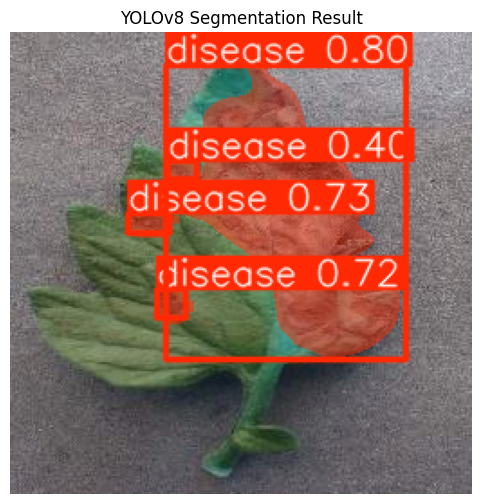

🦠 Predicted Disease Classes:
 - disease
 - disease
 - disease
 - disease


In [21]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# === Load your YOLOv8 segmentation model ===
model = YOLO("/Users/aidarmamaturaimov/Downloads/runs/segment/train5/weights/best.pt")

# === Path to the test image ===
image_path = "/Users/aidarmamaturaimov/Downloads/PlantVillage_FYP_cl/train/Tomato___Early_blight/16ae1b64-2954-4135-bea5-d599ba56740c___RS_Erly.B 7649.jpg"

# === Run inference ===
results = model(image_path)

# === Show segmentation result in Jupyter ===
segmented_img = results[0].plot()  # numpy image with masks + boxes

plt.figure(figsize=(8, 6))
plt.imshow(segmented_img)
plt.axis('off')
plt.title("YOLOv8 Segmentation Result")
plt.show()

# === Print disease class names detected ===
print("🦠 Predicted Disease Classes:")
for box in results[0].boxes:
    cls_id = int(box.cls[0])
    label = model.names[cls_id]
    print(f" - {label}")
